In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_iterative_mitigator_info.pkl", "rb") as f:
    mthree_iterative_mitigator_info = pickle.load(f)

In [3]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
ignis_length = 19
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Times

In [4]:
ignis_total_times = [ignis_mitigator_info[i]["times"]["total"] for i in range(ignis_length)]
delta_total_times = [delta_mitigator_info[i]["times"]["total"] for i in range(max_length)]
lnp_total_times = [lnp_mitigator_info[i]["times"]["total"] for i in range(max_length)]
mooney01_total_times = [mooney01_mitigator_info[i]["times"]["total"] for i in range(mooney01_length)]
mooney001_total_times = [mooney001_mitigator_info[i]["times"]["total"] for i in range(mooney001_length)]
nation_bicgstab_total_times = [nation_bicgstab_mitigator_info[i]["times"]["total"] for i in range(nation_bicgstab_length)]
nation_lu_total_times = [nation_lu_mitigator_info[i]["times"]["total"] for i in range(max_length)]
mthree_iterative_total_times = [mthree_iterative_mitigator_info[i]["times"]["total"] * 1000 for i in range(max_length)]

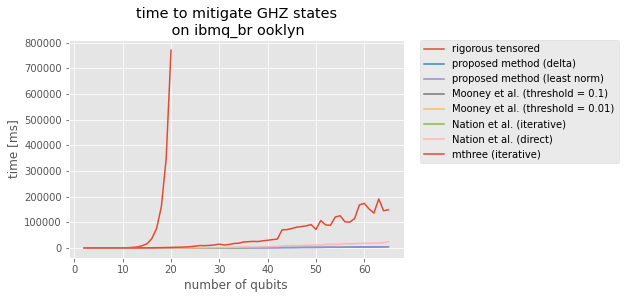

In [5]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C0")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C2")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C3")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)", color="C5")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (direct)", color="C6")
plt.plot(range(2, max_length + 2), mthree_iterative_total_times, label="mthree (iterative)", color="C7")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states\n on ibmq_br ooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

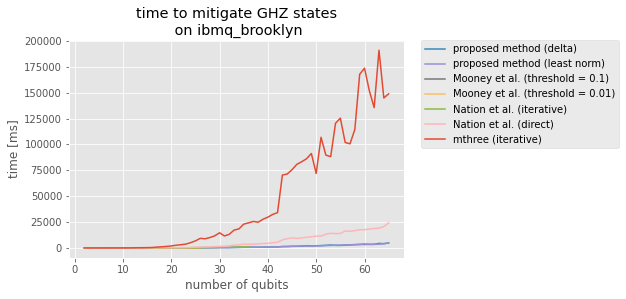

In [6]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored", color="C0")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C2")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C3")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)", color="C5")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (direct)", color="C6")
plt.plot(range(2, max_length + 2), mthree_iterative_total_times, label="mthree (iterative)", color="C7")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

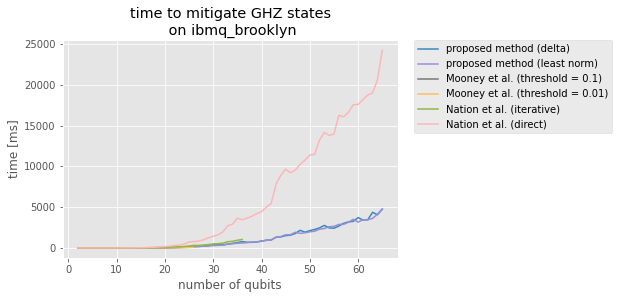

In [7]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored"", color="C0")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C2")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C3")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)", color="C5")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (direct)", color="C6")
# plt.plot(range(2, max_length + 2), mthree_iterative_total_times, label="mthree (iterative)", color="C7")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

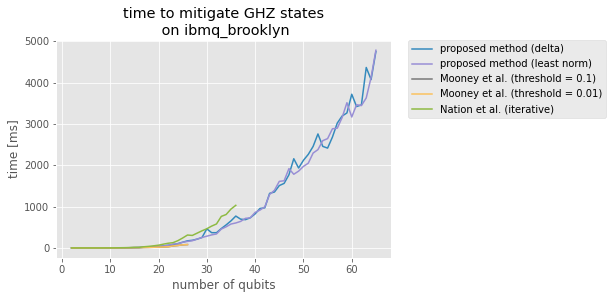

In [8]:
plt.clf()
plt.style.use('ggplot')
# plt.plot(range(2, ignis_length + 2), ignis_total_times, label="rigorous tensored"", color="C0")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)", color="C1")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)", color="C2")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)", color="C3")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)", color="C4")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)", color="C5")
# plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (direct)", color="C6")
# plt.plot(range(2, max_length + 2), mthree_iterative_total_times, label="mthree (iterative)", color="C7")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states\n on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)